In [23]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt

In [5]:
# O caminho para o arquivo CSV dentro da pasta 'data'
print("Insira o arquivo (data) da base de dados no diretório 'data':")
data_file=input()
file_path = f"data/historico{data_file}_data.csv"
print(f"Arquivo a ser lido: {file_path}")

Insira o arquivo (data) da base de dados no diretório 'data':
Arquivo a ser lido: data/historico14-07_data.csv


In [6]:
# pd.read_csv() lê o arquivo e o transforma em um DataFrame
df = pd.read_csv(file_path)

print(f"Lendo {file_path}...")

Lendo data/historico14-07_data.csv...


In [7]:
print(df)

    SEMESTER UNIT  YEAR ANUAL SEMESTER  \
0        1.0  760  2022    1º Semestre   
1        1.0  760  2022    1º Semestre   
2        1.0  760  2022    1º Semestre   
3        1.0  760  2022    1º Semestre   
4        1.0  SMA  2022    1º Semestre   
5        1.0  SMA  2022    1º Semestre   
6        2.0  750  2022    2º Semestre   
7        2.0  750  2022    2º Semestre   
8        2.0  760  2022    2º Semestre   
9        2.0  760  2022    2º Semestre   
10       2.0  760  2022    2º Semestre   
11       2.0  760  2022    2º Semestre   
12       2.0  SMA  2022    2º Semestre   
13       2.0  SME  2022    2º Semestre   
14       3.0  760  2023    1º Semestre   
15       3.0  760  2023    1º Semestre   
16       3.0  760  2023    1º Semestre   
17       3.0  760  2023    1º Semestre   
18       3.0  760  2023    1º Semestre   
19       3.0  SMA  2023    1º Semestre   
20       4.0  760  2023    2º Semestre   
21       4.0  760  2023    2º Semestre   
22       4.0  760  2023    2º Seme

In [8]:
def media_ponderada_geral(df, precision):
    """
    Calcula e imprime a média ponderada geral de um DataFrame de histórico escolar
    com um número personalizável de casas decimais.
    ESTA VERSÃO NÃO MODIFICA O DATAFRAME ORIGINAL.
    """
    # FIX: Trabalha em uma cópia para não alterar o DataFrame original
    df = df.copy()

    # Garante que as colunas necessárias são numéricas, tratando erros
    df['GRADE'] = pd.to_numeric(df['GRADE'], errors='coerce')
    df['TOTAL CREDITS'] = pd.to_numeric(df['TOTAL CREDITS'], errors='coerce')

    # Filtra apenas as linhas com notas válidas para o cálculo
    df_com_notas = df.dropna(subset=['GRADE'])

    # Evita divisão por zero se não houver créditos válidos
    if df_com_notas['TOTAL CREDITS'].sum() == 0:
        print("Não há créditos válidos para calcular a média.")
        return

    # Calcula os componentes da média ponderada
    soma_ponderada_notas = (df_com_notas['GRADE'] * df_com_notas['TOTAL CREDITS']).sum()
    total_creditos_validos = df_com_notas['TOTAL CREDITS'].sum()

    # Calcula a média final
    media = soma_ponderada_notas / total_creditos_validos

    # Usa a variável 'precision' para formatar a string de saída
    print(f"Sua Média Ponderada Geral é: {media:.{precision}f}")

In [9]:
media_ponderada_geral(df,4)

Sua Média Ponderada Geral é: 7.9428


In [10]:
modified_df = df.copy()

# Coloque aqui a sua nota de Sistemas Operacionais
sua_nova_nota = 8.0

# Usa .loc para encontrar a linha e atualizar a coluna 'GRADE'
modified_df.loc[modified_df['COURSE NAME'] == 'Sistemas Operacionais', 'GRADE'] = sua_nova_nota

In [11]:
media_ponderada_geral(modified_df,4)

Sua Média Ponderada Geral é: 7.9444


--- Análise de Desempenho e Consistência por Semestre ---
              mean       std  min   max  count
SEMESTER                                      
1.0       6.900000  1.247397  5.1   8.3      6
2.0       7.787500  2.051785  5.0  10.0      8
3.0       7.950000  0.575326  7.2   8.8      6
4.0       8.366667  0.907010  7.0   9.7      6
5.0       8.500000  1.480991  6.3   9.5      4
6.0       8.675000  1.065755  7.3   9.7      4
7.0       7.733333  0.251661  7.5   8.0      3
8.0            NaN       NaN  NaN   NaN      0


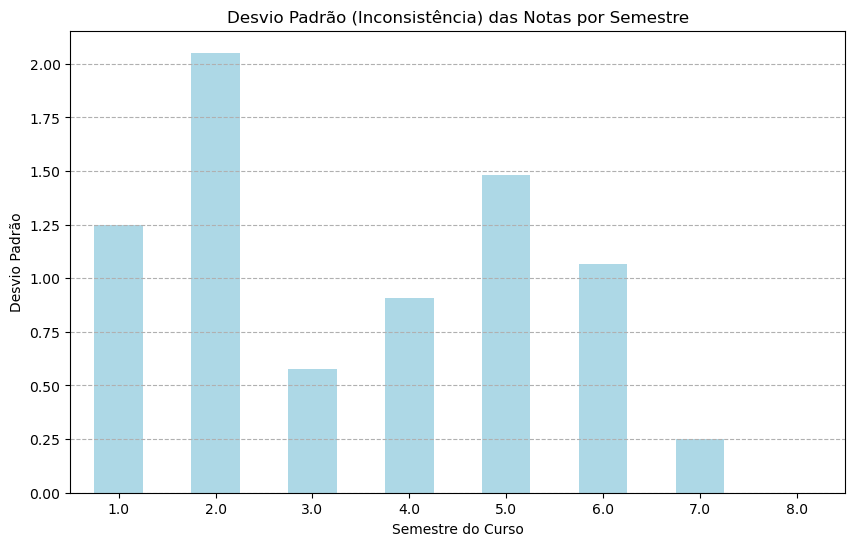

In [12]:
# Certifique-se de que o DataFrame 'df' está carregado e as colunas 'GRADE' e 'TOTAL CREDITS' são numéricas
df['GRADE'] = pd.to_numeric(df['GRADE'], errors='coerce')
df['TOTAL CREDITS'] = pd.to_numeric(df['TOTAL CREDITS'], errors='coerce')

# Agrupa por semestre e calcula várias estatísticas de uma vez com .agg()
resumo_semestral = df.groupby('SEMESTER')['GRADE'].agg(['mean', 'std', 'min', 'max', 'count'])

print("--- Análise de Desempenho e Consistência por Semestre ---")
print(resumo_semestral)

# Gráfico de barras para visualizar o desvio padrão (inconsistência)
resumo_semestral['std'].plot(kind='bar', figsize=(10, 6), color='lightblue')
plt.title('Desvio Padrão (Inconsistência) das Notas por Semestre')
plt.ylabel('Desvio Padrão')
plt.xlabel('Semestre do Curso')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

--- Média Ponderada por Unidade Académica ---
UNIT
SME    10.000000
760     8.035644
SCC     7.900000
SMA     7.363636
750     5.750000
dtype: float64


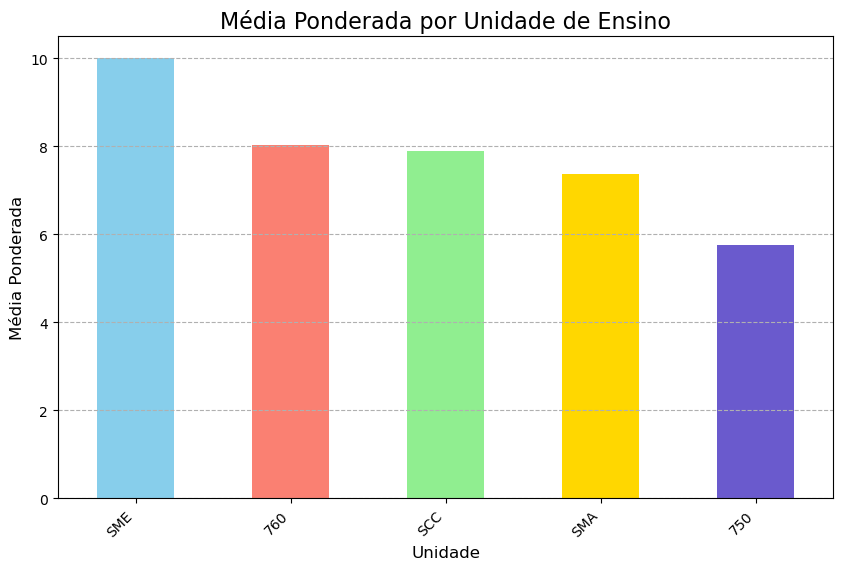

In [16]:
# --- Análise de Desempenho por Unidade Acadêmica (Sem Aviso) ---

# Converte as colunas necessárias para o formato numérico
df['GRADE'] = pd.to_numeric(df['GRADE'], errors='coerce')
df['TOTAL CREDITS'] = pd.to_numeric(df['TOTAL CREDITS'], errors='coerce')

# Remove as linhas sem nota e CRIA UMA CÓPIA EXPLÍCITA para evitar o aviso
df_com_notas = df.dropna(subset=['GRADE']).copy()

# Agora, esta modificação é feita na cópia, sem ambiguidade
df_com_notas['PONDERADA'] = df_com_notas['GRADE'] * df_com_notas['TOTAL CREDITS']

# O resto do cálculo permanece o mesmo
somas_unidade = df_com_notas.groupby('UNIT').sum(numeric_only=True)
media_por_unidade = (somas_unidade['PONDERADA'] / somas_unidade['TOTAL CREDITS']).sort_values(ascending=False)

print("--- Média Ponderada por Unidade Académica ---")
print(media_por_unidade)

# Gráfico de barras para comparar o desempenho
plt.figure(figsize=(10, 6))
media_por_unidade.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'slateblue'])
plt.title('Média Ponderada por Unidade de Ensino', fontsize=16)
plt.xlabel('Unidade', fontsize=12)
plt.ylabel('Média Ponderada', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

--- Média Ponderada por Área de Conhecimento ---
AREA
Computação    9.045455
Física        8.035644
Matemática    7.363636
Química       5.750000
dtype: float64


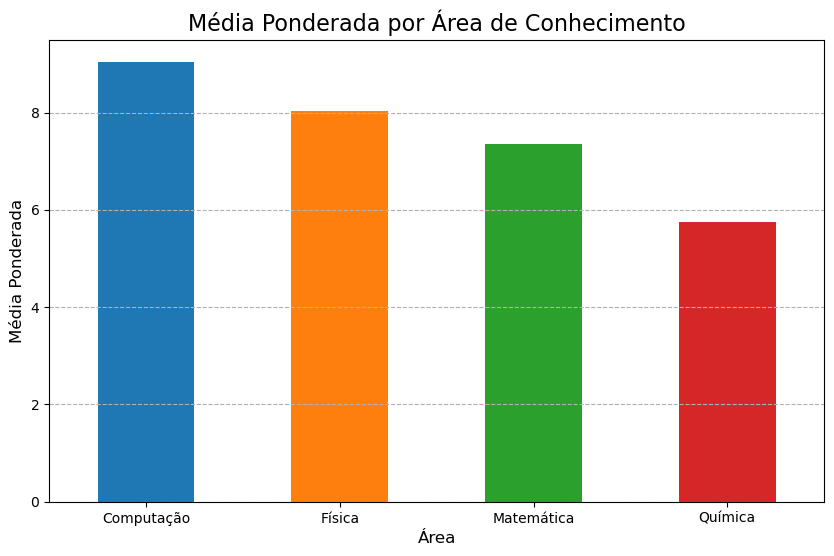

In [21]:
# --- Análise de Desempenho por Área de Conhecimento ---

# 1. Dicionário com o mapeamento de códigos para as áreas
area_map = {
    '760': 'Física',
    '750': 'Química',
    'SMA': 'Matemática',
    'SME': 'Computação',
    'SCC': 'Computação',
    'PRG': 'Programas da Reitoria' # Adicionado para completar os dados
}

# 2. Cria a nova coluna 'AREA' no DataFrame
# O método .map() substitui cada código de unidade pela sua área correspondente
df['AREA'] = df['UNIT'].astype(str).map(area_map)

# 3. Calcula a média ponderada para cada área
df_com_notas = df.dropna(subset=['GRADE']).copy()
df_com_notas['PONDERADA'] = df_com_notas['GRADE'] * df_com_notas['TOTAL CREDITS']

somas_area = df_com_notas.groupby('AREA').sum(numeric_only=True)
media_por_area = (somas_area['PONDERADA'] / somas_area['TOTAL CREDITS']).sort_values(ascending=False)

print("--- Média Ponderada por Área de Conhecimento ---")
print(media_por_area)

# 4. Gera o gráfico de barras para visualização
plt.figure(figsize=(10, 6))
media_por_area.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Média Ponderada por Área de Conhecimento', fontsize=16)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Média Ponderada', fontsize=12)
plt.xticks(rotation=0) # Mantém os nomes na horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

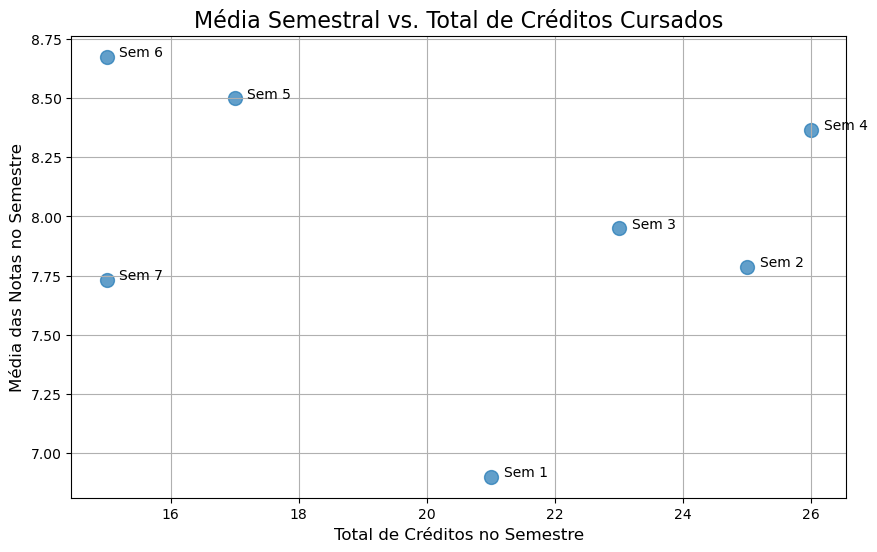

In [15]:
# --- Análise de Carga de Trabalho vs. Desempenho ---

# Agrupa por semestre para somar os créditos e calcular a média das notas
carga_vs_desempenho = df.groupby('SEMESTER').agg(
    TOTAL_CREDITS_SEMESTER=('TOTAL CREDITS', 'sum'),
    AVERAGE_GRADE_SEMESTER=('GRADE', 'mean')
).dropna()

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(carga_vs_desempenho['TOTAL_CREDITS_SEMESTER'], carga_vs_desempenho['AVERAGE_GRADE_SEMESTER'], s=100, alpha=0.7)

# Adiciona rótulos aos pontos para identificar o semestre
for i, row in carga_vs_desempenho.iterrows():
    plt.text(row['TOTAL_CREDITS_SEMESTER'] + 0.2, row['AVERAGE_GRADE_SEMESTER'], f'Sem {int(i)}')

plt.title('Média Semestral vs. Total de Créditos Cursados', fontsize=16)
plt.xlabel('Total de Créditos no Semestre', fontsize=12)
plt.ylabel('Média das Notas no Semestre', fontsize=12)
plt.grid(True)
plt.show()

--- Carga de Trabalho por Semestre (COM Iniciação Científica) ---
          TOTAL_CREDITS_SEMESTER  AVERAGE_GRADE_SEMESTER
SEMESTER                                                
1.0                           21                6.900000
2.0                           25                7.787500
3.0                           23                7.950000
4.0                           26                8.366667
5.0                           25                8.500000
6.0                           23                8.675000
7.0                           23                7.733333


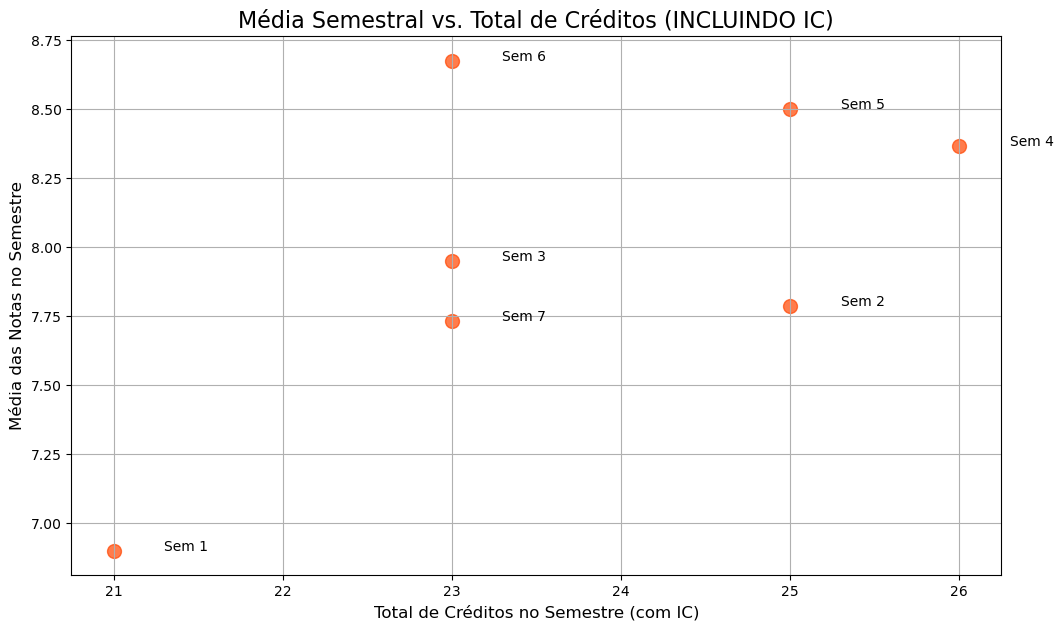

In [22]:
# --- Análise de Carga de Trabalho com Iniciação Científica (IC) ---

# 1. Cria uma cópia do DataFrame para a simulação
df_com_ic = df.copy()

# 2. Cria os dados para as novas atividades de IC
# Atribuímos 'NaN' à nota para não afetar os cálculos de média de desempenho
ic_data = [
    {'SEMESTER': 5, 'UNIT': 'IC', 'YEAR': 2024, 'ANUAL SEMESTER': '1º Semestre', 'COURSE NAME': 'Iniciação Científica', 'TOTAL CREDITS': 8, 'LECTURE CREDITS': 8, 'WORK CREDITS': 0, 'GRADE': np.nan},
    {'SEMESTER': 6, 'UNIT': 'IC', 'YEAR': 2024, 'ANUAL SEMESTER': '2º Semestre', 'COURSE NAME': 'Iniciação Científica', 'TOTAL CREDITS': 8, 'LECTURE CREDITS': 8, 'WORK CREDITS': 0, 'GRADE': np.nan},
    {'SEMESTER': 7, 'UNIT': 'IC', 'YEAR': 2025, 'ANUAL SEMESTER': '1º Semestre', 'COURSE NAME': 'Iniciação Científica', 'TOTAL CREDITS': 8, 'LECTURE CREDITS': 8, 'WORK CREDITS': 0, 'GRADE': np.nan}
]
df_ic = pd.DataFrame(ic_data)

# 3. Combina o DataFrame original com os dados da IC
df_com_ic = pd.concat([df_com_ic, df_ic], ignore_index=True)


# 4. Refaz a análise de Carga de Trabalho vs. Desempenho com os novos dados
# Agrupa por semestre para somar os créditos e calcular a média das notas
carga_vs_desempenho_ic = df_com_ic.groupby('SEMESTER').agg(
    TOTAL_CREDITS_SEMESTER=('TOTAL CREDITS', 'sum'),
    AVERAGE_GRADE_SEMESTER=('GRADE', 'mean')
).dropna()

print("--- Carga de Trabalho por Semestre (COM Iniciação Científica) ---")
print(carga_vs_desempenho_ic)


# 5. Gera o novo gráfico de dispersão
plt.figure(figsize=(12, 7))
plt.scatter(carga_vs_desempenho_ic['TOTAL_CREDITS_SEMESTER'], carga_vs_desempenho_ic['AVERAGE_GRADE_SEMESTER'], s=100, alpha=0.7, color='orangered')

# Adiciona rótulos aos pontos para identificar o semestre
for i, row in carga_vs_desempenho_ic.iterrows():
    plt.text(row['TOTAL_CREDITS_SEMESTER'] + 0.3, row['AVERAGE_GRADE_SEMESTER'], f'Sem {int(i)}')

plt.title('Média Semestral vs. Total de Créditos (INCLUINDO IC)', fontsize=16)
plt.xlabel('Total de Créditos no Semestre (com IC)', fontsize=12)
plt.ylabel('Média das Notas no Semestre', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# --- Análise Interativa de Desempenho (VERSÃO OTIMIZADA) ---

# --- 1. CÁLCULOS PESADOS (FEITOS APENAS UMA VEZ) ---

# Garante que o DataFrame 'df' está limpo e pronto para a análise
df['GRADE'] = pd.to_numeric(df['GRADE'], errors='coerce')
df['TOTAL CREDITS'] = pd.to_numeric(df['TOTAL CREDITS'], errors='coerce')
df_com_notas = df.dropna(subset=['GRADE']).copy()

# Encontra o primeiro e o último semestre
primeiro_semestre = df_com_notas['SEMESTER'].min()
ultimo_semestre = df_com_notas['SEMESTER'].max()

# Pré-calcula a média ponderada original
df_com_notas['PONDERADA_ORIGINAL'] = df_com_notas['GRADE'] * df_com_notas['TOTAL CREDITS']
somas_semestre_original = df_com_notas.groupby('SEMESTER').sum(numeric_only=True)
media_original = somas_semestre_original['PONDERADA_ORIGINAL'] / somas_semestre_original['TOTAL CREDITS']

# Pré-calcula os fatores de dificuldade que não mudam
df_com_notas['fator_inexperiencia'] = (ultimo_semestre - df_com_notas['SEMESTER']) / (ultimo_semestre - primeiro_semestre)
df_com_notas['fator_dificuldade'] = (df_com_notas['SEMESTER'] - primeiro_semestre) / (ultimo_semestre - primeiro_semestre)


# --- 2. FUNÇÃO INTERATIVA (LEVE E RÁPIDA) ---

def plot_desempenho_ajustado(peso_inexperiencia, peso_dificuldade):
    """
    Esta função agora só faz o cálculo final, usando os dados pré-calculados.
    """
    df_ajustado = df_com_notas.copy()
    
    # Aplica os pesos dos sliders para calcular a nota ajustada
    nota_ajustada = df_ajustado['GRADE'] + \
                    (df_ajustado['fator_inexperiencia'] * peso_inexperiencia) + \
                    (df_ajustado['fator_dificuldade'] * peso_dificuldade)
    
    df_ajustado['ADJUSTED_GRADE'] = np.clip(nota_ajustada, 0, 10)

    # Recalcula APENAS a média ponderada ajustada
    df_ajustado['PONDERADA_AJUSTADA'] = df_ajustado['ADJUSTED_GRADE'] * df_ajustado['TOTAL CREDITS']
    somas_semestre_ajustado = df_ajustado.groupby('SEMESTER').sum(numeric_only=True)
    media_ajustada = somas_semestre_ajustado['PONDERADA_AJUSTADA'] / somas_semestre_ajustado['TOTAL CREDITS']

    # --- Geração do Gráfico ---
    plt.figure(figsize=(14, 8))
    plt.plot(media_original.index, media_original.values, marker='o', linestyle='--', color='gray', label='Desempenho Original')
    plt.plot(media_ajustada.index, media_ajustada.values, marker='o', linestyle='-', color='blue', label='Desempenho Ajustado')

    plt.title('Curva de Desempenho Ajustada por Dificuldade', fontsize=16)
    plt.xlabel('Semestre do Curso', fontsize=12)
    plt.ylabel('Média Ponderada Ajustada', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.xticks(range(1, int(ultimo_semestre) + 1))
    plt.ylim(5, 10.5)
    plt.show()

# --- 3. CRIAÇÃO DOS WIDGETS ---

# Cria os sliders interativos
interactive_plot = interactive(plot_desempenho_ajustado, 
                               peso_inexperiencia=widgets.FloatSlider(min=0, max=2.0, step=0.1, value=0.5, description='Peso Inexperiência:'),
                               peso_dificuldade=widgets.FloatSlider(min=0, max=2.0, step=0.1, value=0.5, description='Peso Dificuldade:'))

# Exibe o gráfico interativo
display(interactive_plot)